In [38]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
import os
drive.mount('/content/drive')
os.chdir("drive/My Drive/Colab Notebooks/DemandPricing Project")

Mounted at /content/drive


## DATA
https://www.kaggle.com/datasets/manjeetsingh/retaildataset?fbclid=IwAR0agdB6DzmEnhrpvULZA2S9kd9ynCfW1nYbu-jyEuK8fOYB1J0Ku56El28

In [242]:
df_feature = pd.read_csv("Features data set.csv")
df_sales = pd.read_csv("sales data-set.csv")

In [243]:
df_feature[df_feature['Store'] == 1]

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
177,1,28/06/2013,83.94,3.495,4205.98,796.70,6.84,3816.78,4812.74,NaN,NaN,False
178,1,05/07/2013,79.85,3.422,7649.99,3503.29,1766.77,9454.96,1079.89,NaN,NaN,False
179,1,12/07/2013,83.12,3.400,6089.94,1362.42,209.62,2367.42,2651.05,NaN,NaN,False
180,1,19/07/2013,79.26,3.556,3117.04,1060.39,199.05,1012.30,5381.72,NaN,NaN,False


In [244]:
df_sales[df_sales['Store'] == 1]

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False
...,...,...,...,...,...
10239,1,99,31/08/2012,20.06,False
10240,1,99,07/09/2012,0.05,True
10241,1,99,14/09/2012,0.03,False
10242,1,99,05/10/2012,635.00,False


## Data Prep


In [245]:
# Convert Date to Datetime type & sort by the date
df_sales.Date = pd.to_datetime(df_sales.Date)
df_feature.Date = pd.to_datetime(df_feature.Date)

df_sales = df_sales.sort_values('Date')
df_feature = df_feature.sort_values('Date')

In [246]:
# Cut til 2012-12-10
df_feature = df_feature[df_feature.Date.dt.date <= df_sales.Date.dt.date.max()]

In [247]:
# Merge the Feature df and Sales df
df = df_sales.merge(df_feature, on = ['Store','Date'], how = 'left')
df = df.loc[:, df.columns!='IsHoliday_x']
df = df.rename(columns={'IsHoliday_y': 'IsHoliday'})
df['Year'] = df['Date'].dt.year
#df = df.dropna()
df

,Store,Dept,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Year
0,33,96,2010-01-10,7854.09,91.45,3.001,NaN,NaN,NaN,NaN,NaN,126.234600,9.265,False,2010
1,17,93,2010-01-10,3533.76,60.07,2.853,NaN,NaN,NaN,NaN,NaN,126.234600,6.885,False,2010
2,30,85,2010-01-10,43.92,70.28,2.603,NaN,NaN,NaN,NaN,NaN,211.329874,8.163,False,2010
3,30,87,2010-01-10,119.80,70.28,2.603,NaN,NaN,NaN,NaN,NaN,211.329874,8.163,False,2010
4,9,55,2010-01-10,6795.58,69.08,2.603,NaN,NaN,NaN,NaN,NaN,215.214134,6.560,False,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,1,82,2012-12-10,21963.11,62.99,3.601,2086.18,NaN,8.11,602.36,5926.45,223.381296,6.573,False,2012
421566,9,81,2012-12-10,2526.96,60.09,3.601,520.41,NaN,6.01,NaN,2839.84,227.169392,4.954,False,2012
421567,19,7,2012-12-10,27983.12,48.29,4.186,2374.50,NaN,7.25,919.32,6101.00,138.911700,7.992,False,2012
421568,2,95,2012-12-10,145394.36,60.97,3.601,2145.50,NaN,33.31,586.83,10421.01,223.015426,6.170,False,2012


In [248]:
# Imputation on Markdowns NaN -> 0
for i in range(1,6):
    df['MarkDown'+str(i)] = df['MarkDown'+str(i)].replace(np.nan, 0)

# EDA

In [249]:
df = df[df['Date'] > datetime.datetime(2011, 1, 1)]
df

,Store,Dept,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Year
140679,10,18,2011-01-04,2967.11,67.64,3.772,0.00,0.0,0.00,0.00,0.00,128.719935,8.494,False,2011
140680,45,27,2011-01-04,1149.99,37.27,3.638,0.00,0.0,0.00,0.00,0.00,185.179017,8.521,False,2011
140681,31,14,2011-01-04,20078.21,56.36,3.524,0.00,0.0,0.00,0.00,0.00,214.488691,7.931,False,2011
140682,28,5,2011-01-04,27526.77,63.63,3.772,0.00,0.0,0.00,0.00,0.00,128.719935,13.736,False,2011
140683,36,90,2011-01-04,36253.54,67.31,3.529,0.00,0.0,0.00,0.00,0.00,213.577670,8.300,False,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,1,82,2012-12-10,21963.11,62.99,3.601,2086.18,0.0,8.11,602.36,5926.45,223.381296,6.573,False,2012
421566,9,81,2012-12-10,2526.96,60.09,3.601,520.41,0.0,6.01,0.00,2839.84,227.169392,4.954,False,2012
421567,19,7,2012-12-10,27983.12,48.29,4.186,2374.50,0.0,7.25,919.32,6101.00,138.911700,7.992,False,2012
421568,2,95,2012-12-10,145394.36,60.97,3.601,2145.50,0.0,33.31,586.83,10421.01,223.015426,6.170,False,2012


### Avg Sales by Week

(10000.0, 18832.52821438149)

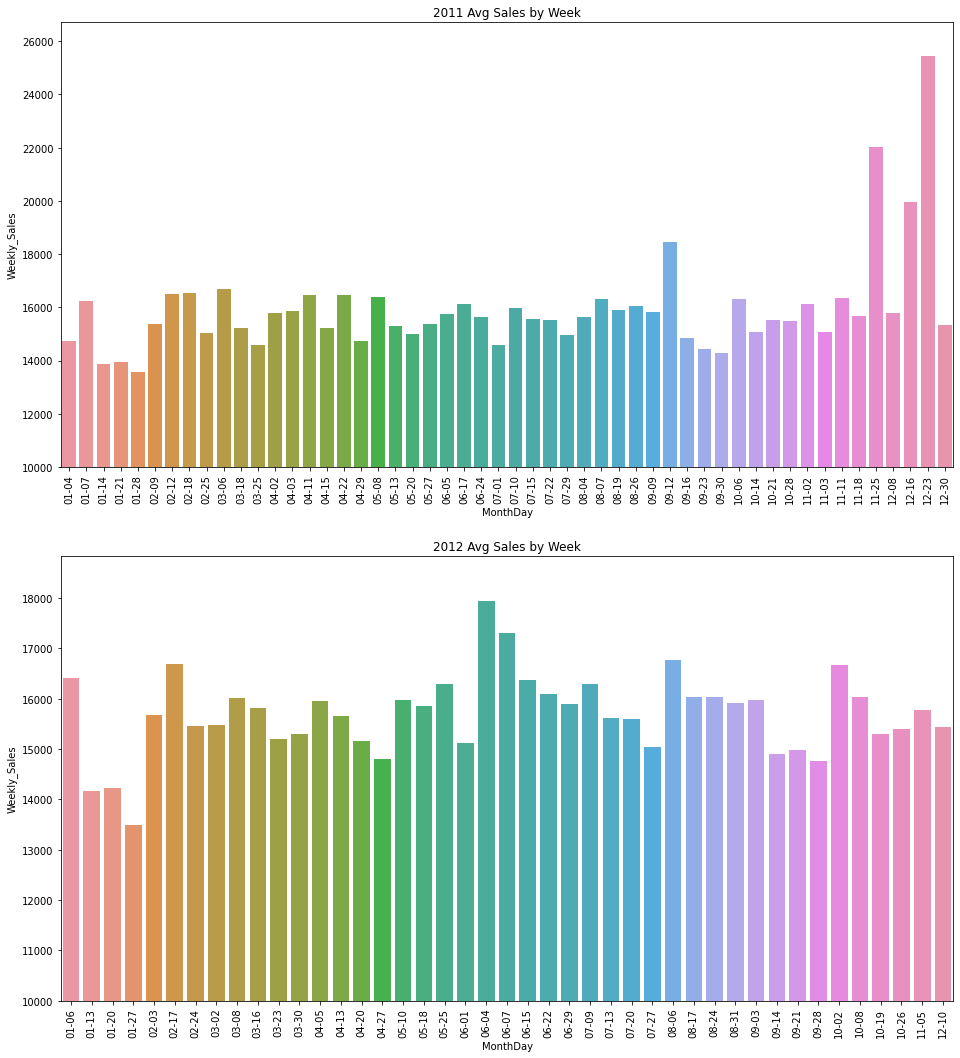

In [140]:
sales_by_date = df.groupby('Date')[['Weekly_Sales']].mean()
sales_by_date['Year'] = sales_by_date.index.strftime('20%y')
sales_by_date['MonthDay'] = sales_by_date.index.strftime('%m-%d')
sales_by_date11 = sales_by_date[sales_by_date['Year']=="2011"]
sales_by_date12 = sales_by_date[sales_by_date['Year']=="2012"]

fig, (ax1, ax2) = plt.subplots(2,1, figsize=(16,18))
sns.barplot(ax=ax1, x='MonthDay', y='Weekly_Sales', data=sales_by_date11)
ax1.set_title("2011 Avg Sales by Week")

sns.barplot(ax=ax2, x='MonthDay', y='Weekly_Sales', data=sales_by_date12)
ax2.set_title("2012 Avg Sales by Week")

ax1.set_xticklabels(sales_by_date11['MonthDay'], rotation=90, ha='center')
ax2.set_xticklabels(sales_by_date12['MonthDay'], rotation=90, ha='center')

ax1.set_ylim(10000)
ax2.set_ylim(10000)

### Avg CPI by Month

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


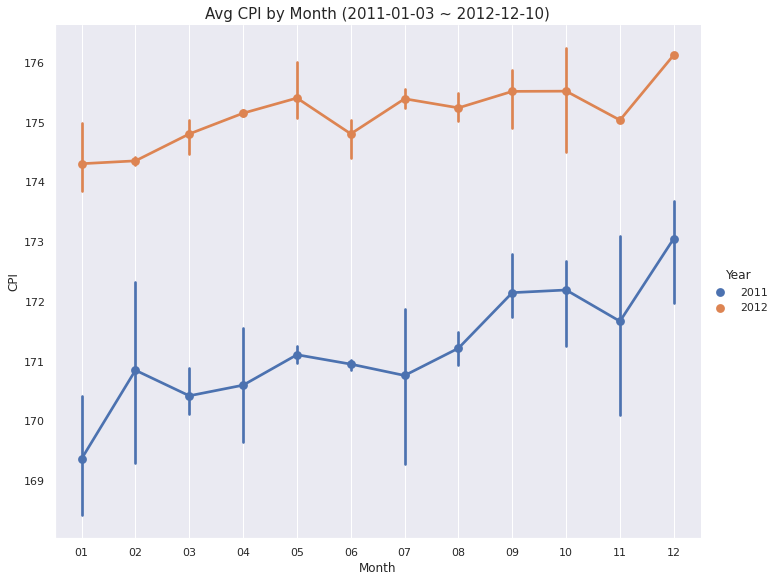

In [187]:
cpi_by_date = df.groupby('Date')[['CPI']].mean()
cpi_by_date['Year'] = cpi_by_date.index.strftime('20%y')
cpi_by_date['Month'] = cpi_by_date.index.strftime('%m')

sns.factorplot(x="Month", y="CPI", hue='Year', data=cpi_by_date, size=8, aspect=1.25)
plt.title("Avg CPI by Month (2011-01-03 ~ 2012-12-10)", size=15)
plt.grid()

### CPI Trend

Text(0.5, 1.0, 'CPI Trend (2011-01-03 ~ 2012-12-10)')

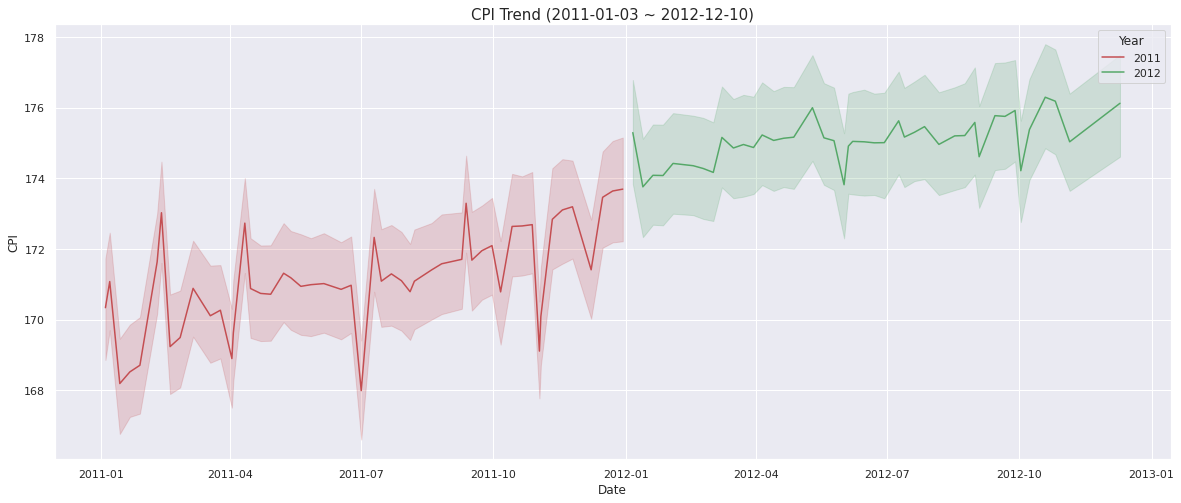

In [189]:
plt.figure(figsize=(20,8))
sns.set_theme(style="darkgrid")
sns.lineplot(x='Date', y='CPI', data=df, hue='Year', palette=['r', 'g'])
plt.title("CPI Trend (2011-01-03 ~ 2012-12-10)", size=15)

### Weekly Sales Trend

Text(0.5, 1.0, 'Weekly Sales Trend (2011-01-03 ~ 2012-12-10)')

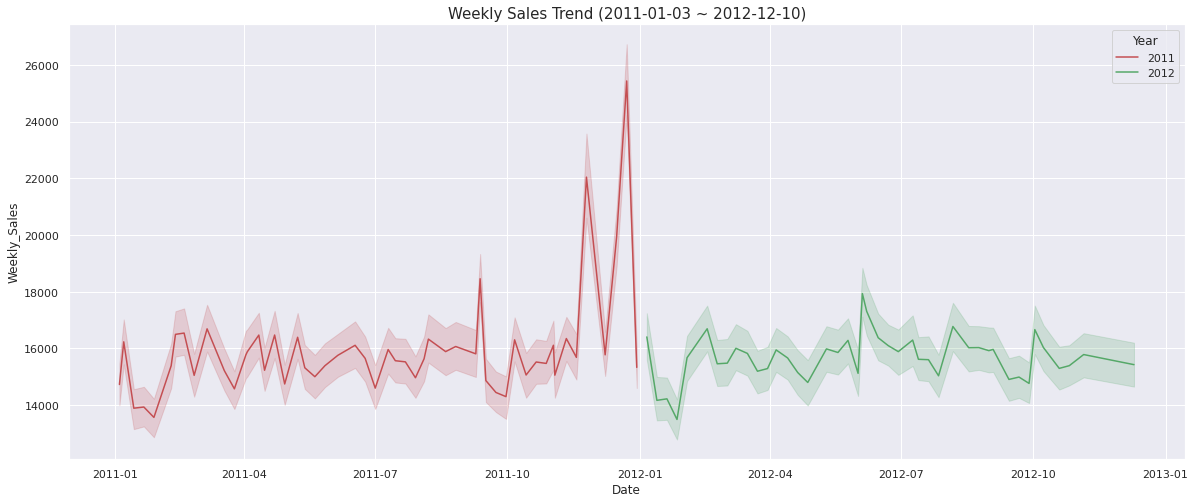

In [190]:
plt.figure(figsize=(20,8))
sns.set_theme(style="darkgrid")
sns.lineplot(x='Date', y='Weekly_Sales', data=df, hue='Year', palette=['r', 'g'])
plt.title("Weekly Sales Trend (2011-01-03 ~ 2012-12-10)", size=15)

### Fuel Price Trend

Text(0.5, 1.0, 'Fuel Price Trend (2011-01-03 ~ 2012-12-10)')

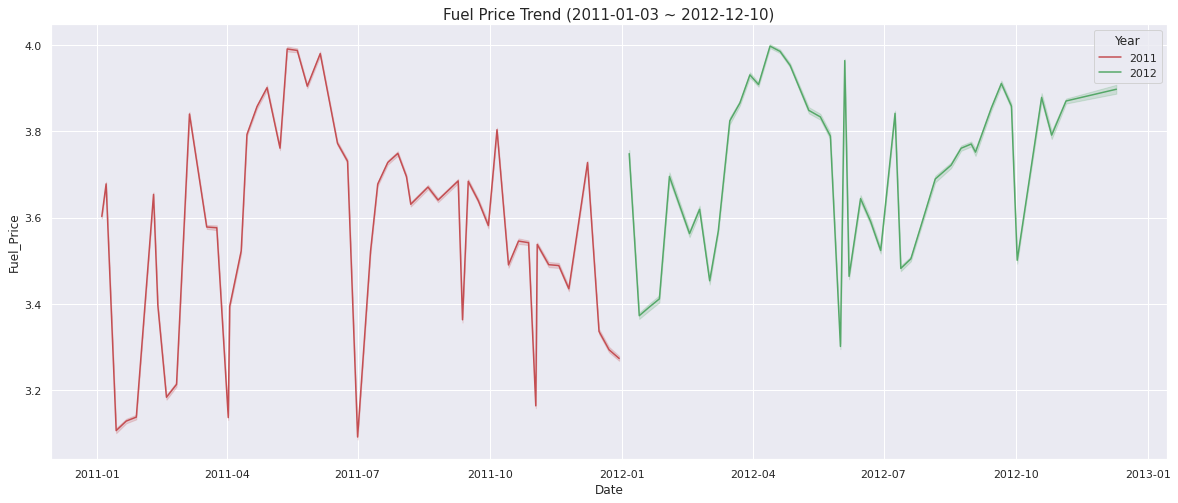

In [191]:
plt.figure(figsize=(20,8))
sns.set_theme(style="darkgrid")
sns.lineplot(x='Date', y='Fuel_Price', data=df, hue='Year', palette=['r', 'g'])
plt.title("Fuel Price Trend (2011-01-03 ~ 2012-12-10)", size=15)

### Unemployment Rate Trend

Text(0.5, 1.0, 'Unemployment Rate Trend (2011-01-03 ~ 2012-12-10)')

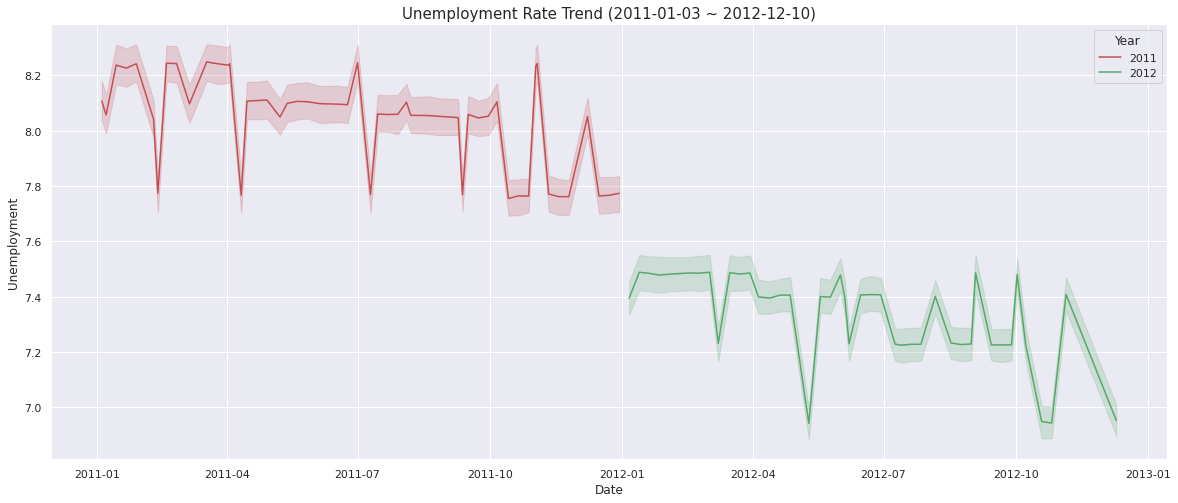

In [192]:
plt.figure(figsize=(20,8))
sns.set_theme(style="darkgrid")
sns.lineplot(x='Date', y='Unemployment', data=df, hue='Year', palette=['r', 'g'])
plt.title("Unemployment Rate Trend (2011-01-03 ~ 2012-12-10)", size=15)

### Jointplot between CPI and Unemployment Rate

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


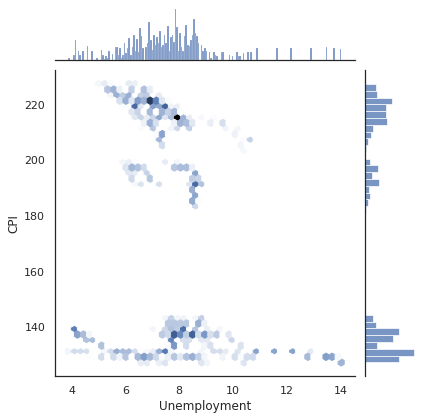

In [194]:
cpi_unemp = df[['CPI', 'Unemployment']]
with sns.axes_style('white'):
    sns.jointplot("Unemployment", "CPI", cpi_unemp, kind='hex')

### Markdown by Date

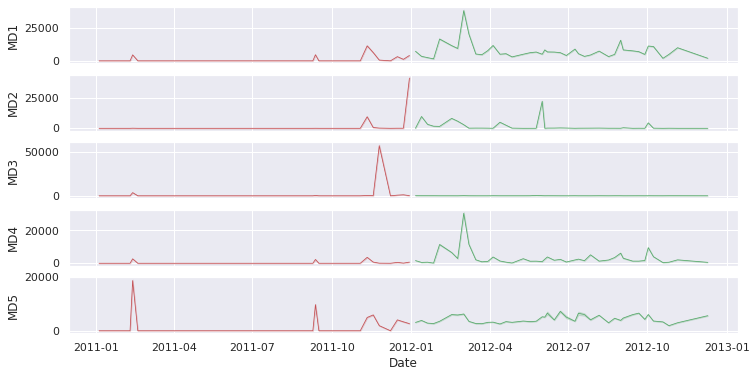

In [251]:
date_unique = df['Date'].unique()

fig, axes = plt.subplots(5,1, figsize=(12,6), sharex=True)

for i in range(5):
    sns.lineplot(ax=axes[i], x='Date', y='MarkDown'+str(i+1), data=df, hue='Year', size=10, legend=False, palette=['r', 'g'])
    axes[i].set_ylabel("MD"+str(i+1))